In [10]:
from biopandas.pdb import PandasPdb 

In [11]:
ppdb = PandasPdb() 

In [12]:
# reading data 
ppdb.read_pdb('../data/3eiy.pdb')

In [13]:
# reading gz 
ppdb.read_pdb('../data/3eiy.pdb.gz')

In [14]:
!head ../data/3eiy.pdb

HEADER    HYDROLASE                               17-SEP-08   3EIY              
TITLE     CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHATASE FROM BURKHOLDERIA      
TITLE    2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE                                
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: INORGANIC PYROPHOSPHATASE;                                 
COMPND   3 CHAIN: A;                                                            
COMPND   4 EC: 3.6.1.1;                                                         
COMPND   5 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: BURKHOLDERIA PSEUDOMALLEI 1710B;                


In [15]:
ppdb.code 

'3eiy'

In [16]:
ppdb.header

'    HYDROLASE                               17-SEP-08   3EIY'

In [17]:
ppdb.pdb_text[:1000]

'HEADER    HYDROLASE                               17-SEP-08   3EIY              \nTITLE     CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHATASE FROM BURKHOLDERIA      \nTITLE    2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE                                \nCOMPND    MOL_ID: 1;                                                            \nCOMPND   2 MOLECULE: INORGANIC PYROPHOSPHATASE;                                 \nCOMPND   3 CHAIN: A;                                                            \nCOMPND   4 EC: 3.6.1.1;                                                         \nCOMPND   5 ENGINEERED: YES                                                      \nSOURCE    MOL_ID: 1;                                                            \nSOURCE   2 ORGANISM_SCIENTIFIC: BURKHOLDERIA PSEUDOMALLEI 1710B;                \nSOURCE   3 ORGANISM_TAXID: 320372;                                              \nSOURCE   4 GENE: PPA, BURPS1710B_1237;                                          \nSOURCE   5 EXPR

In [18]:
# convert into pandas df 
ppdb.df['ATOM'].head() 

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,,2.527,54.656,-1.667,1.0,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,,3.259,54.783,-0.368,1.0,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,,4.127,53.553,-0.105,1.0,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,,5.274,53.451,-0.594,1.0,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,,2.273,54.944,0.792,1.0,52.69,,,C,NaN,613


In [19]:
# convert into pandas df 
ppdb.df['HETATM'].head() 

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,1332,,K,,K,,A,176,,,24.990,43.276,0.005,0.5,24.45,,,K,NaN,1940
1,HETATM,1333,,NA,,NA,,A,177,,,1.633,34.181,11.897,1.0,26.73,,,NA,NaN,1941
2,HETATM,1334,,NA,,NA,,A,178,,,6.489,35.143,8.444,1.0,30.89,,,NA,NaN,1942
3,HETATM,1335,,P1,,POP,,A,179,,,1.233,37.542,11.212,1.0,32.68,,,P,NaN,1943
4,HETATM,1336,,O1,,POP,,A,179,,,1.910,38.831,11.612,1.0,32.62,,,O,NaN,1944


In [21]:
ppdb.df['ANISOU'].head() 

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,"U(1,1)","U(2,2)","U(3,3)","U(1,2)","U(1,3)","U(2,3)",blank_4,element_symbol,charge,line_idx


In [22]:
ppdb.df['OTHERS'].head() 

,record_name,entry,line_idx
0,HEADER,HYDROLASE 17...,0
1,TITLE,CRYSTAL STRUCTURE OF INORGANIC PYROPHOSPHA...,1
2,TITLE,2 PSEUDOMALLEI WITH BOUND PYROPHOSPHATE,2
3,COMPND,MOL_ID: 1;,3
4,COMPND,2 MOLECULE: INORGANIC PYROPHOSPHATASE;,4


In [20]:
ppdb.df.keys() 

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [23]:
# dtypes
ppdb.df['ATOM'].dtypes 

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

In [24]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

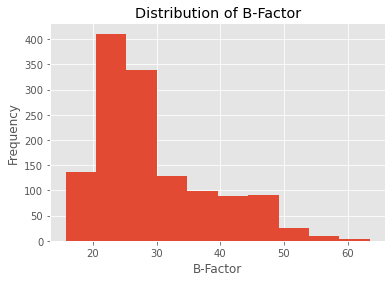

In [26]:
ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factor')
plt.xlabel('B-Factor')
plt.ylabel('Frequency')
plt.show() 

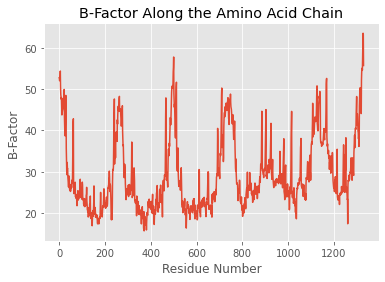

In [28]:
ppdb.df['ATOM']['b_factor'].plot(kind='line')
plt.title('B-Factor Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-Factor')
plt.show() 

In [29]:
ppdb.df['ATOM']['element_symbol'].value_counts() 

C    857
O    251
N    217
S      5
Name: element_symbol, dtype: int64

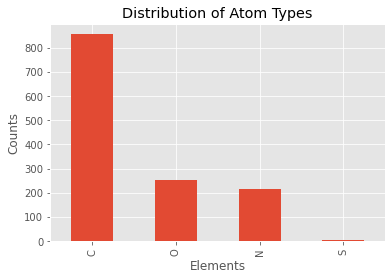

In [31]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('Elements')
plt.ylabel('Counts')
plt.show() 